In [7]:
from models.LR import LinearPredictor
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
np.set_printoptions(precision=6, suppress=True)

In [ ]:
tickers = ["EEM","EFA","JPXN","SPY","XLK",'VTI','AGG','DBC']

In [ ]:
model = LinearPredictor() # 创建实例
results = []
for ticker in tickers:  # 加载数据
    model.load_data(f'data/FeatureData/{ticker}.csv')
    model.prepare_target(horizon=20)  # 准备目标变量（预测 horizon 可调）
    model.train(start_date='2023-01-01', end_date='2023-12-31')  # 用 2023 年训练
    c_hat, c_true, dates = model.predict(start_date='2024-01-01', end_date='2024-01-31')  # 用 2024 年 1 月做预测

    for d, ch, ct in zip(dates, c_hat, c_true):
        results.append({
            'Date': d,
            'Ticker': ticker,
            'c_hat': ch,
            'c_true': ct
        })

df_results = pd.DataFrame(results)
# 使用 pivot 表将预测值和真实值分别整理为 Date × Ticker 的格式
df_c_hat = df_results.pivot(index='Date', columns='Ticker', values='c_hat')
df_c_true = df_results.pivot(index='Date', columns='Ticker', values='c_true')


,Date,Ticker,c_hat,c_true
0,2024-01-02,EEM,0.001609,0.001241
1,2024-01-03,EEM,0.001364,0.001383
2,2024-01-04,EEM,0.001033,0.001511
3,2024-01-05,EEM,0.000728,0.001407
4,2024-01-08,EEM,0.000937,0.000911
...,...,...,...,...
155,2024-01-24,DBC,-0.000105,0.000133
156,2024-01-25,DBC,0.000385,0.000578
157,2024-01-26,DBC,0.000482,0.000583
158,2024-01-29,DBC,0.000596,0.001188


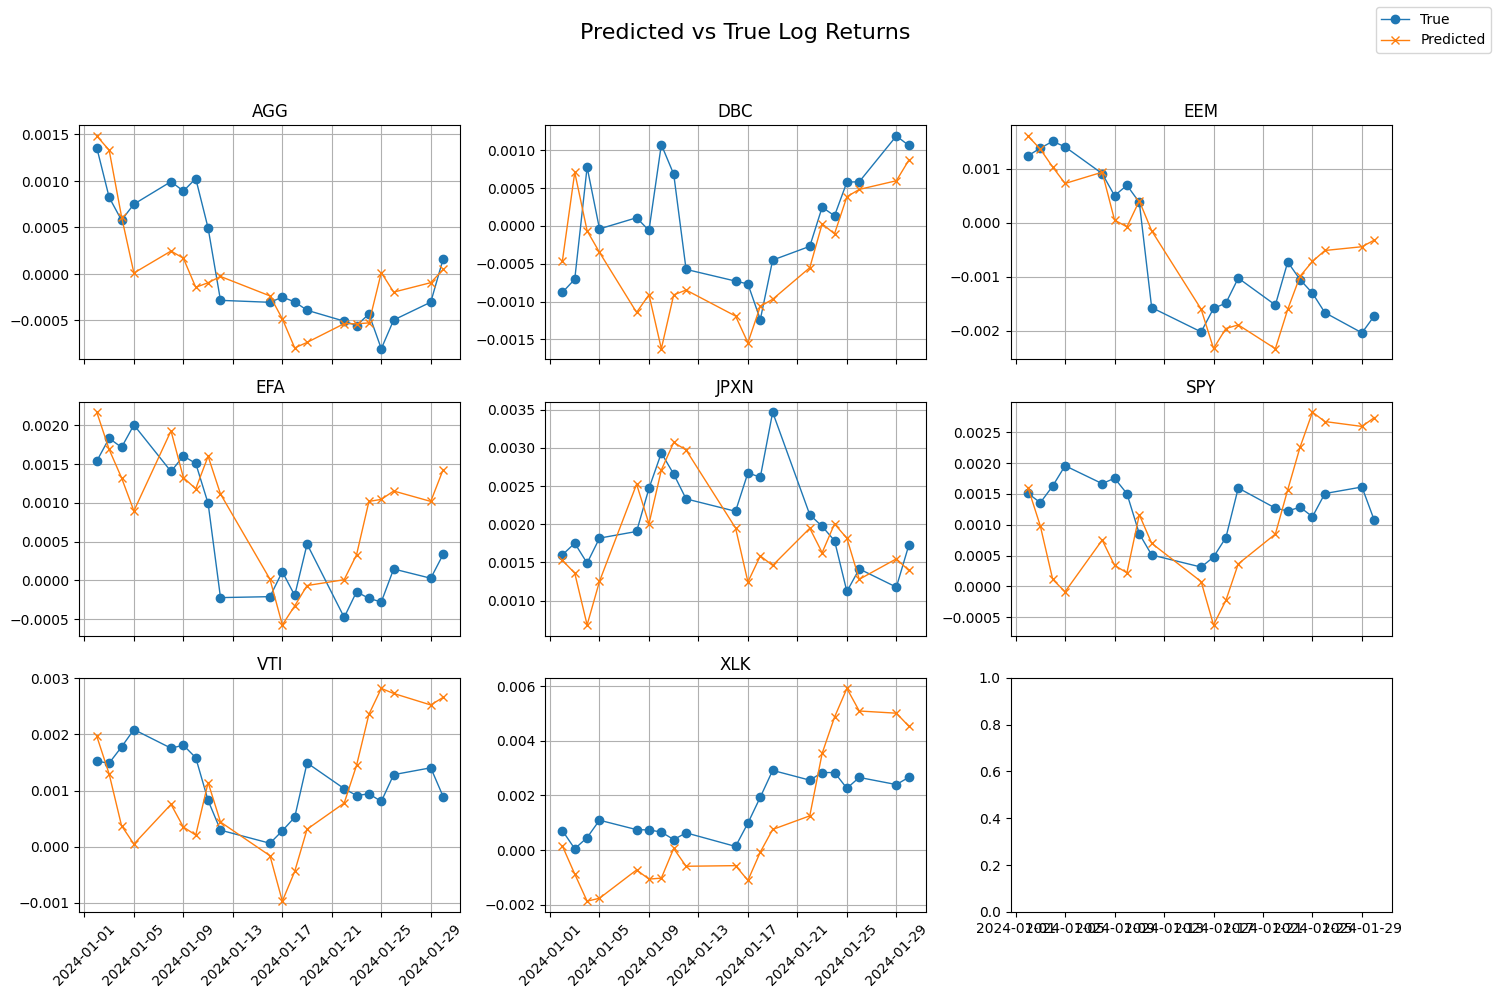

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 选取前几个 Ticker 画图
tickers_to_plot = df_c_hat.columns[:9]  # 最多9个
dates = pd.to_datetime(df_c_hat.index)

# 创建子图网格
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(tickers_to_plot):
    ax = axes[i]
    ax.plot(dates, df_c_true[ticker], label='True', marker='o', linewidth=1)
    ax.plot(dates, df_c_hat[ticker], label='Predicted', marker='x', linewidth=1)
    ax.set_title(ticker)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# 图例与布局
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Predicted vs True Log Returns", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()
